# 0.0 Imports

In [175]:
import pandas as pd


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

import graphviz

import seaborn as sns

import numpy as np

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# 1.0 Carregando dados


In [176]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         1
34           926         0
35           927         0
36           928         1
37           929         1
38           930         0
39           931         0
40           932         0
41           933         0
42           934         0
43           935         1
44           936         1
45           937         0
46           938         0
47           939         0
48           940         1
49           941         1
50           942         0
51           943         0
52           944         1
53           945         1
54           946         0
55           947         0
56           948         0
57           949         0
58           950         0
59           951         1
60           952         0
61           953         0
62           954         0
63           955         1
64           956         0
65           957         1
66           958         1
67           959         0
68           960         0
69           961         1
70           962         1
71           963         0
72           964         1
73           965         0
74           966         1
75           967         0
76           968         0
77           969         1
78           970         0
79           971         1
80           972         0
81           973         0
82           974         0
83           975         0
84           976         0
85           977         0
86           978         1
87           979         1
88           980         1
89           981         0
90           982         1
91           983         0
92           984         1
93           985         0
94           986         0
95           987         0
96           988         1
97           989         0
98           990         1
99           991         0
100          992         1
101          993         0
102          994         0
103          995         0
104          996         1
105          997         0
106          998         0
107          999         0
108         1000         0
109         1001         0
110         1002         0
111         1003         1
112         1004         1
113         1005         1
114         1006         1
115         1007         0
116         1008         0
117         1009         1
118         1010         0
119         1011         1
120         1012         1
121         1013         0
122         1014         1
123         1015         0
124         1016         0
125         1017         1
126         1018         0
127         1019         1
128         1020         0
129         1021         0
130         1022         0
131         1023         0
132         1024         1
133         1025         0
134         1026         0
135         1027         0
136         1028         0
137         1029         0
138         1030         1
139         1031         0
140         1032         1
141         1033         1
142         1034         0
143         1035         0
144         1036         0
145         1037         0
146         1038         0
147      

Tabela com os ID's da tabela "test.csv" e se sobreviveram ou não, sendo 0 não e 1 sim.

In [177]:
test_df = pd.read_csv('test.csv')
test_df

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

Tabela com os passageiros sem a informação se sobreviveram.

In [178]:
train_df = pd.read_csv('train.csv')
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

Tabela com os passageiros com a informação se sobreviveram.

# 2.0 Transformando dados

In [179]:
train_columns = ['id', 'sobreviveu', 'classe', 'nome', 'sexo', 'idade', 'sibSp',
       'parch', 'biblete', 'tarifa_passageiro', 'cabine', 'porto_embarcado']
test_columns = ['id', 'classe', 'nome', 'sexo', 'idade', 'sibSp',
       'parch', 'biblete', 'tarifa_passageiro', 'cabine', 'porto_embarcado', 'sobreviveu']
sexo = {'male': 1 ,
        'female': 0}
portos = {'Q':0, 
          'S':1, 
          'C':2,
          3:3}

sibPs = número de irmãos ou cônjuges no navio <br>
parch = número de filhos ou pais no navio

In [180]:
test_df1 = test_df.merge(gender_submission, on='PassengerId' )

test_df1.columns = test_columns

test_df1 = test_df1.drop(['id', 'nome', 'biblete', 'cabine'], axis=1).dropna()

test_df1.idade = test_df1.idade.astype(np.int64)
test_df1.tarifa_passageiro = test_df1.tarifa_passageiro.astype(np.int64)

test_df1.sexo = test_df1.sexo.map(sexo)
test_df1.porto_embarcado = test_df1.porto_embarcado.map(portos)

test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   classe             331 non-null    int64
 1   sexo               331 non-null    int64
 2   idade              331 non-null    int64
 3   sibSp              331 non-null    int64
 4   parch              331 non-null    int64
 5   tarifa_passageiro  331 non-null    int64
 6   porto_embarcado    331 non-null    int64
 7   sobreviveu         331 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


In [181]:
train_df1 = train_df.copy()


train_df1.columns = train_columns

train_df1 = train_df1.drop(['id', 'nome', 'biblete', 'cabine'], axis=1).dropna()

train_df1.idade = train_df1.idade.astype(np.int64)
train_df1.tarifa_passageiro = train_df1.tarifa_passageiro.astype(np.int64)

train_df1.sexo = train_df1.sexo.map(sexo)
train_df1.porto_embarcado = train_df1.porto_embarcado.map(portos)

train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sobreviveu         712 non-null    int64
 1   classe             712 non-null    int64
 2   sexo               712 non-null    int64
 3   idade              712 non-null    int64
 4   sibSp              712 non-null    int64
 5   parch              712 non-null    int64
 6   tarifa_passageiro  712 non-null    int64
 7   porto_embarcado    712 non-null    int64
dtypes: int64(8)
memory usage: 50.1 KB


# 3.0 Implementando modelos

In [182]:
train_x = train_df1.drop(['sobreviveu'], axis=1)
train_y = train_df1.sobreviveu
test_x = test_df1.drop(['sobreviveu'], axis=1)
test_y = test_df1.sobreviveu

In [183]:
# Decision Tree

modelo_Decision_Tree = DecisionTreeClassifier(max_depth=3)
modelo_Decision_Tree.fit(train_x, train_y)
previsoes_Decision_Tree = modelo_Decision_Tree.predict(test_x)

acuracia_Decision_Tree = accuracy_score(test_y, previsoes_Decision_Tree) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Decision_Tree)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 96.68%


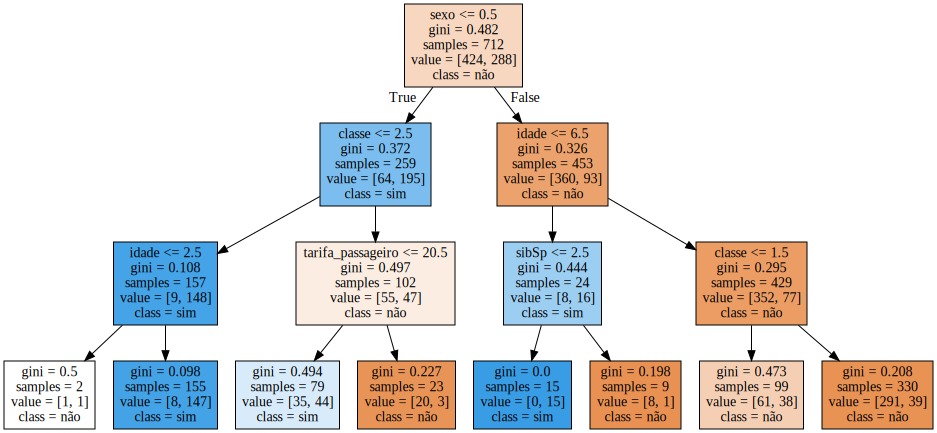

In [184]:
dot_data = export_graphviz(modelo_Decision_Tree, out_file=None, feature_names=train_x.columns, filled=True, class_names=['não', 'sim'])
grafico =graphviz.Source(dot_data)
grafico

In [185]:
# SVM

modelo_SVC = SVC(kernel='linear')
modelo_SVC.fit(train_x, train_y)
previsoes_SVC = modelo_SVC.predict(test_x)

acuracia_SVC = accuracy_score(test_y, previsoes_SVC) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_SVC)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 100.00%


In [186]:
# logistic Regression

modelo_Logistic_Regression = LogisticRegression()
modelo_Logistic_Regression.fit(train_x, train_y)
previsoes_Logistic_Regression = modelo_Logistic_Regression.predict(test_x)

acuracia_Logistic_Regression = accuracy_score(test_y, previsoes_Logistic_Regression) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Logistic_Regression)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 90.63%


In [187]:
# Random Forest Classifiern

modelo_Random_Forest_Classifiern = RandomForestClassifier()
modelo_Random_Forest_Classifiern.fit(train_x, train_y)
previsoes_Random_Forest_Classifiern = modelo_Random_Forest_Classifiern.predict(test_x)

acuracia_Random_Forest_Classifiern = accuracy_score(test_y, previsoes_Random_Forest_Classifiern) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Random_Forest_Classifiern)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 80.97%


In [188]:
# KneighborsClassifier

modelo_Random_KNeighborsClassifier = KNeighborsClassifier( n_neighbors=3)
modelo_Random_KNeighborsClassifier.fit(train_x, train_y)
previsoes_KNeighborsClassifier = modelo_Random_KNeighborsClassifier.predict(test_x)

acuracia_Random_KNeighborsClassifier = accuracy_score(test_y, previsoes_KNeighborsClassifier) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Random_KNeighborsClassifier)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 61.03%


In [189]:
# KMeans

modelo_KMeans = KMeans(n_clusters=2, n_init=2)
modelo_KMeans.fit(train_x, train_y)
previsoes_KMeans = modelo_KMeans.predict(test_x)

acuracia_KMeans = accuracy_score(test_y, previsoes_KMeans) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_KMeans)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 63.14%
